# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Muhammad Ferry Fernanda
- **Email:** feefeenan@gmail.com
- **ID Dicoding:** ferfernanda

## Menentukan Pertanyaan Bisnis

- Question 1: When are the most bicycles rented per day
- Question 2: When are the most bicycles rented by season depends on weather
- Question 3: Bicycle usage patterns based on hours by whole time
- Question 4: How Bicycle Rent Patterns in Holidays and Working Days

## Import Semua Packages/Library yang Digunakan

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import zipfile

## Data Wrangling

### Gathering Data

In [2]:
# Download Dataset from Kaggle
!kaggle datasets download -d lakshmi25npathi/bike-sharing-dataset

Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset
License(s): unknown
bike-sharing-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
# Unzipping Dataset
zip_ref = zipfile.ZipFile('bike-sharing-dataset.zip', 'r')
zip_ref.extractall('/content/')
zip_ref.close()

In [4]:
# DataFrame Day
df_day = pd.read_csv("/content/day.csv")
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
# DataFrame Hour
df_hour = pd.read_csv("/content/hour.csv")
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [6]:
# Assessing Day Data
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
# Assessing Hour Data
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [8]:
# Check Duplicate
print('Duplicate Day Data:', df_day.duplicated().sum())
print('Duplicate Hour Data:', df_hour.duplicated().sum())

Duplicate Day Data: 0
Duplicate Hour Data: 0


In [9]:
# Check Null Value in Day
df_day.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
# Check Null Value in Hour
df_hour.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [11]:
# Describe Day Data
df_day.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,731.0,366.000000,211.165812,1.000000,183.500000,366.000000,548.500000,731.000000
season,731.0,2.496580,1.110807,1.000000,2.000000,3.000000,3.000000,4.000000
yr,731.0,0.500684,0.500342,0.000000,0.000000,1.000000,1.000000,1.000000
mnth,731.0,6.519836,3.451913,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,731.0,0.028728,0.167155,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,731.0,2.997264,2.004787,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,731.0,0.683995,0.465233,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,731.0,1.395349,0.544894,1.000000,1.000000,1.000000,2.000000,3.000000
temp,731.0,0.495385,0.183051,0.059130,0.337083,0.498333,0.655417,0.861667
atemp,731.0,0.474354,0.162961,0.079070,0.337842,0.486733,0.608602,0.840896


In [12]:
# Describe Hour Data
df_hour.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,17379.0,8690.000000,5017.029500,1.00,4345.5000,8690.0000,13034.5000,17379.0000
season,17379.0,2.501640,1.106918,1.00,2.0000,3.0000,3.0000,4.0000
yr,17379.0,0.502561,0.500008,0.00,0.0000,1.0000,1.0000,1.0000
mnth,17379.0,6.537775,3.438776,1.00,4.0000,7.0000,10.0000,12.0000
hr,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.0000
weathersit,17379.0,1.425283,0.639357,1.00,1.0000,1.0000,2.0000,4.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000


### Cleaning Data

**Dataset characteristics**
- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit :
  - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
  - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

In [13]:
df_day = df_day.drop("instant", axis=1)
df_hour = df_hour.drop("instant", axis=1)

In [14]:
# Rename Column
column_day = {'dteday': 'date',
              'yr': 'year',
              'mnth': 'month',
              'temp': 'temperature',
              'hum': 'humidity',
              'cnt': 'count'}

column_hour = {'dteday': 'date',
               'yr': 'year',
               'mnth': 'month',
               'hr': 'hour',
               'temp': 'temperature',
               'hum': 'humidity',
               'cnt': 'count'}

df_day.rename(columns=column_day, inplace=True)
df_hour.rename(columns=column_hour, inplace=True)

In [15]:
# Categorical Data

seasons = {1: 'Spring',
           2: 'Summer',
           3: 'Fall',
           4: 'Winter'}

years = {0: '2011', 1: '2012'}

months = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
         7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

holidays = {0: 'No', 1: 'Yes'}

weekdays = {0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed',
        4: 'Thu', 5: 'Fri', 6: 'Sat'}

weathersits = {1: 'Clear/Partly Cloudy',
            2: 'Misty/Cloudy',
            3: 'Light Snow/Rain',
            4: 'Severe Weather'}

workingdays = {0: 'Holiday', 1: 'Workingday'}

categorical = ['season', 'year', 'month', 'holiday', 'weekday', 'workingday', 'weathersit']
cat_data = [seasons, years, months, holidays, weekdays, workingdays, weathersits]

cat_dict = dict(zip(categorical, cat_data))

In [16]:
# Date Time - Categorical Day
df_day['date'] = pd.to_datetime(df_day['date'])

for cat, data in cat_dict.items():
  df_day[cat] = df_day[cat].map(data)
  df_day[cat] = df_day[cat].astype('category')

In [17]:
# Date Time - Categorical Hour
df_hour['date'] = pd.to_datetime(df_hour['date'])

for cat, data in cat_dict.items():
  df_hour[cat] = df_hour[cat].map(data)
  df_hour[cat] = df_hour[cat].astype('category')

In [18]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         731 non-null    datetime64[ns]
 1   season       731 non-null    category      
 2   year         731 non-null    category      
 3   month        731 non-null    category      
 4   holiday      731 non-null    category      
 5   weekday      731 non-null    category      
 6   workingday   731 non-null    category      
 7   weathersit   731 non-null    category      
 8   temperature  731 non-null    float64       
 9   atemp        731 non-null    float64       
 10  humidity     731 non-null    float64       
 11  windspeed    731 non-null    float64       
 12  casual       731 non-null    int64         
 13  registered   731 non-null    int64         
 14  count        731 non-null    int64         
dtypes: category(7), datetime64[ns](1), float64(4), int64(3)
m

In [19]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         17379 non-null  datetime64[ns]
 1   season       17379 non-null  category      
 2   year         17379 non-null  category      
 3   month        17379 non-null  category      
 4   hour         17379 non-null  int64         
 5   holiday      17379 non-null  category      
 6   weekday      17379 non-null  category      
 7   workingday   17379 non-null  category      
 8   weathersit   17379 non-null  category      
 9   temperature  17379 non-null  float64       
 10  atemp        17379 non-null  float64       
 11  humidity     17379 non-null  float64       
 12  windspeed    17379 non-null  float64       
 13  casual       17379 non-null  int64         
 14  registered   17379 non-null  int64         
 15  count        17379 non-null  int64         
dtypes: c

In [19]:
%cd E:\Kuliah\Dicoding\Streamlit-Dashboard

In [20]:
# Save Cleaned Dataset (Optional)
df_day.to_csv("cleaned_bike-sharing_day.csv", index=False)
df_hour.to_csv("cleaned_bike-sharing_hour.csv", index=False)

## Exploratory Data Analysis (EDA)

### Explore ...

In [22]:
# Table of Season
df_day.groupby(by='season').agg({
    'count':['min','max','mean']
}).reindex(seasons.values())

count                   
         min   max         mean
season                         
Spring   431  7836  2604.132597
Summer   795  8362  4992.331522
Fall    1115  8714  5644.303191
Winter    22  8555  4728.162921

In [23]:
# Table of Day
df_day.groupby(by='weekday').agg({
    'count':['min','max','mean']
}).reindex(weekdays.values())

count                   
          min   max         mean
weekday                         
Sun       605  8227  4228.828571
Mon        22  7525  4338.123810
Tue       683  7767  4510.663462
Wed       441  8173  4548.538462
Thu       431  7804  4667.259615
Fri      1167  8362  4690.288462
Sat       627  8714  4550.542857

In [24]:
# Table of Hour
df_hour.groupby(by='hour').agg({
    'count':['min','max','mean']
}).reindex(list(range(24)))

count                 
       min  max        mean
hour                       
0        2  283   53.898072
1        1  168   33.375691
2        1  132   22.869930
3        1   79   11.727403
4        1   28    6.352941
5        1   66   19.889819
6        1  213   76.044138
7        1  596  212.064649
8        5  839  359.011004
9       14  426  219.309491
10       8  539  173.668501
11      10  663  208.143054
12       3  776  253.315934
13      11  760  253.661180
14      12  750  240.949246
15       7  750  251.233196
16      11  783  311.983562
17      15  976  461.452055
18      23  977  425.510989
19      11  743  311.523352
20      11  567  226.030220
21       6  584  172.314560
22       9  502  131.335165
23       2  256   87.831044

In [25]:
# Most Rent on Day
max_count_index = df_day['count'].idxmax()
df_day.loc[max_count_index]

date           2012-09-15 00:00:00
season                        Fall
year                          2012
month                          Sep
holiday                         No
weekday                        Sat
workingday                 Holiday
weathersit     Clear/Partly Cloudy
temperature              24.941653
atemp                     29.29335
humidity                   50.1667
windspeed                16.583907
casual                        3160
registered                    5554
count                         8714
Name: 623, dtype: object

## Visualization & Explanatory Analysis

### Question 1: When are the most bicycles rented per day

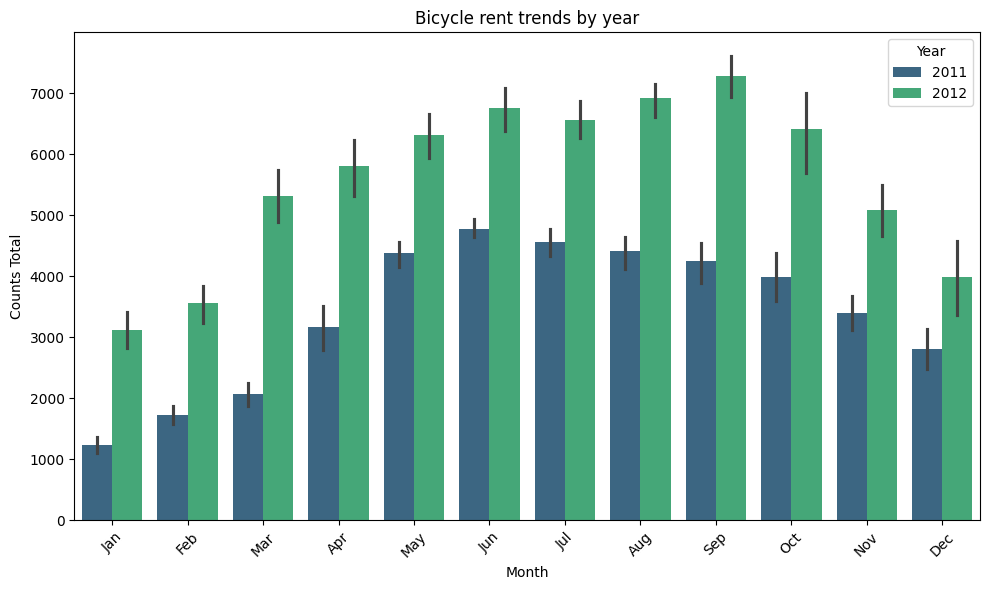

In [66]:
# Bicycle rent trends by year

plt.figure(figsize=(10, 6))
sns.barplot(data=df_day, x='month', y='count', hue='year', palette='viridis', order=list(months.values()))
plt.title('Bicycle rent trends by year')
plt.xlabel('Month')
plt.ylabel('Counts Total')
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.tight_layout()
plt.show()

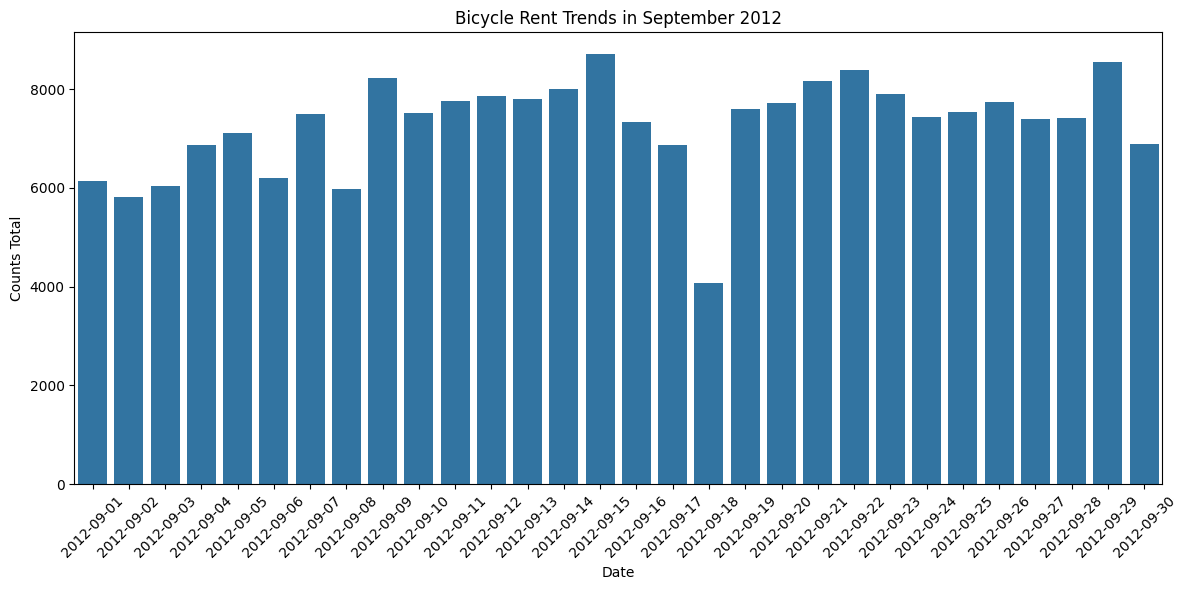

In [67]:
filtered_data = df_day[(df_day['year'] == '2012') & (df_day['month'] == 'Sep')]

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=filtered_data, x='date', y='count')
plt.title('Bicycle Rent Trends in September 2012')
plt.xlabel('Date')
plt.ylabel('Counts Total')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

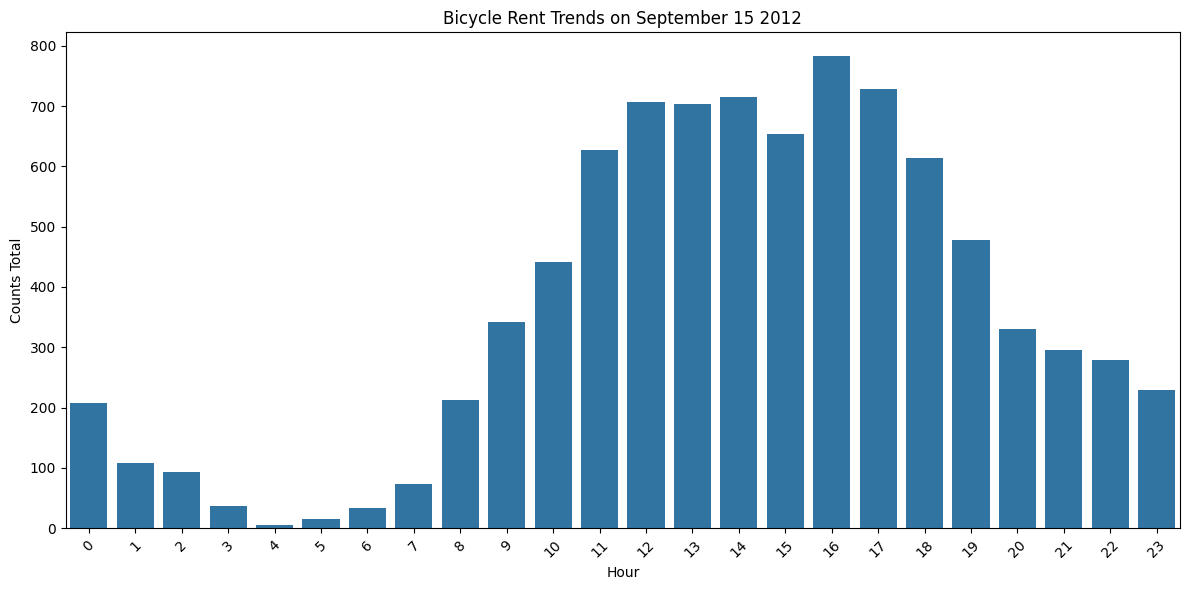

In [68]:
hour = df_hour[(df_hour['date'] == '2012-09-15')]

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=hour, x='hour', y='count')
plt.title('Bicycle Rent Trends on September 15 2012')
plt.xlabel('Hour')
plt.ylabel('Counts Total')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Question 2: When are the most bicycles rented by season depends on weather

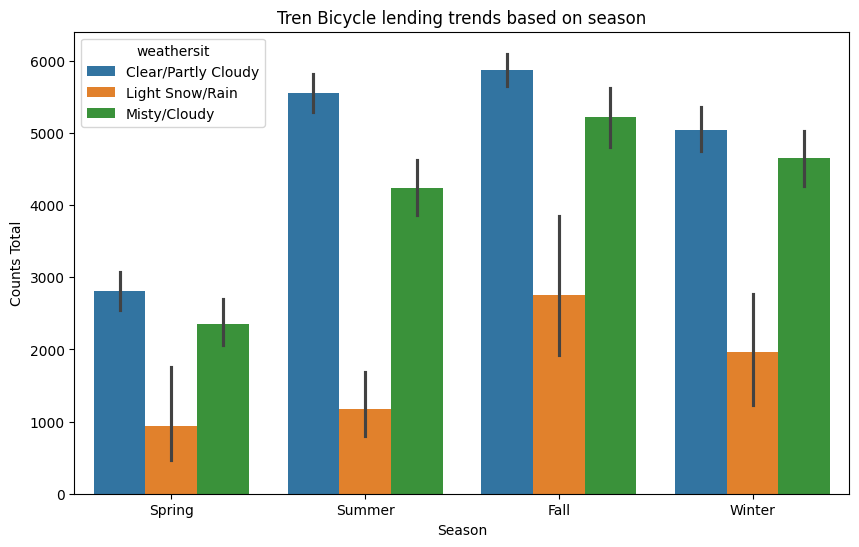

In [69]:
# Tren peminjaman sepeda berdasarkan musim
plt.figure(figsize=(10, 6))
sns.barplot(data=df_day, x='season', y='count', hue='weathersit', order=list(seasons.values()))
plt.title('Tren Bicycle lending trends based on season')
plt.xlabel('Season')
plt.ylabel('Counts Total')
plt.show()

### Question 3: Bicycle usage patterns based on hours by whole time

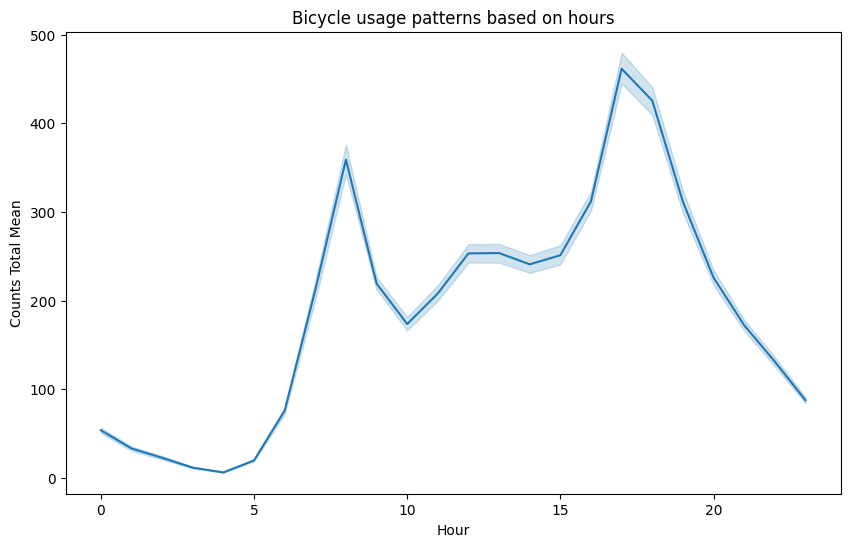

In [70]:
# Bicycle usage patterns based on hours
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_hour, x='hour', y='count', estimator='mean')
plt.title('Bicycle usage patterns based on hours')
plt.xlabel('Hour')
plt.ylabel('Counts Total Mean')
plt.show()

### Question 4: Bicycle Rent Patterns in Holidays and Working Days

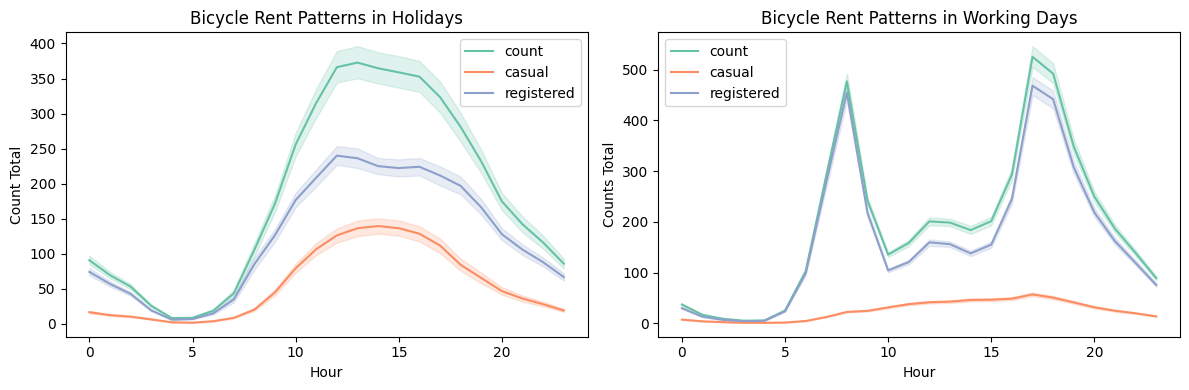

In [72]:
# Checking pattern of non working days using lineplot
mask_holiday = ((df_hour['workingday']=='Holiday') | (df_hour['holiday']=='Yes'))
df_holiday = df_hour[mask_holiday]

columns = ['count','casual','registered']
color_palette = sns.color_palette("Set2")

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
for i, col in enumerate(columns):
    sns.lineplot(x='hour', y=col, data=df_holiday, label=col, color=color_palette[i])
plt.title('Bicycle Rent Patterns in Holidays')
plt.xlabel('Hour')
plt.ylabel('Count Total')
plt.legend()

# Checking pattern of working days using lineplot
mask_working = ((df_hour['workingday']=='Workingday') & (df_hour['holiday']=='No'))
df_working = df_hour[mask_working]

plt.subplot(1, 2, 2)
for i, col in enumerate(columns):
    sns.lineplot(x='hour', y=col, data=df_working, label=col, color=color_palette[i])
plt.title('Bicycle Rent Patterns in Working Days')
plt.xlabel('Hour')
plt.ylabel('Counts Total')
plt.legend()

plt.tight_layout()
plt.show()

## Conclusion

**Question 1: When are the most bicycles rented per day**
- The data analysis indicates that the highest number of bicycles were rented on Saturday, September 15, 2012, with a peak rental time at 16:00, as depicted in the final plot of Question 1. This suggests a pattern of increased bicycle rentals on weekend afternoons.

**Question 2: When are the most bicycles rented by season depends on weather**
- The highest number of bicycles are rented during clear or partially cloudy weather in the summer and fall season. This presents an excellent opportunity for us to advertise our business during these times.

**Question 3: How Bicycle usage patterns based on hours by whole time**
- Bicycle usage consistently peaks in the afternoon throughout the year, regardless of whether it is a weekday or a holiday. This pattern suggests that people are more likely to rent bicycles in the afternoon, possibly due to free time after work or other activities. Businesses can leverage this by offering afternoon promotions or discounts to attract more customers.

**Question 4: How Bicycle Rent Patterns in Holidays and Working Days**
- Holiday vs. Working Day Patterns: The counts total rental patterns on holidays and working days are similar, with a noticeable peak in the afternoon. Both casual and registered rentals follow this pattern. To increase casual rentals on working days, targeted promotions could be effective, encouraging more casual users to rent bicycles during these times.
